<a href="https://colab.research.google.com/github/Ad-Chekk/ML_models/blob/main/Price_Prediction_ProphetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

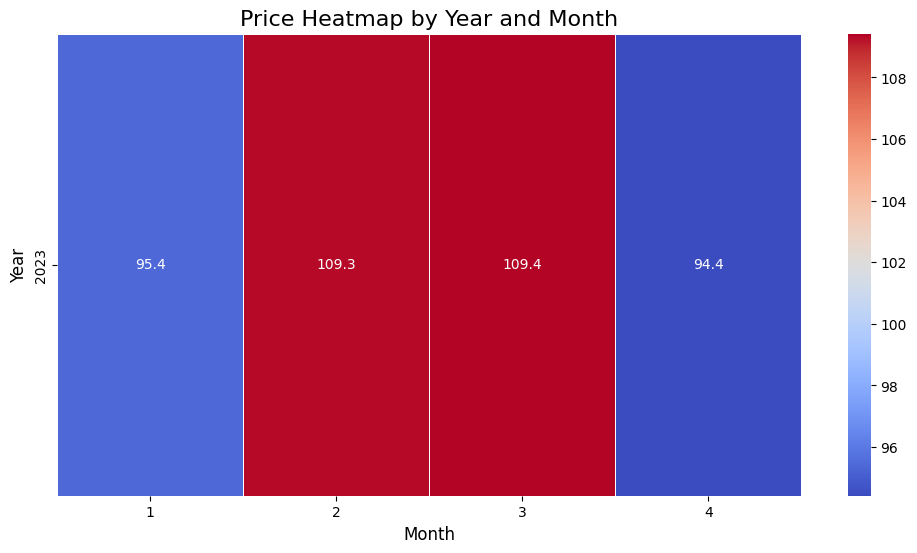

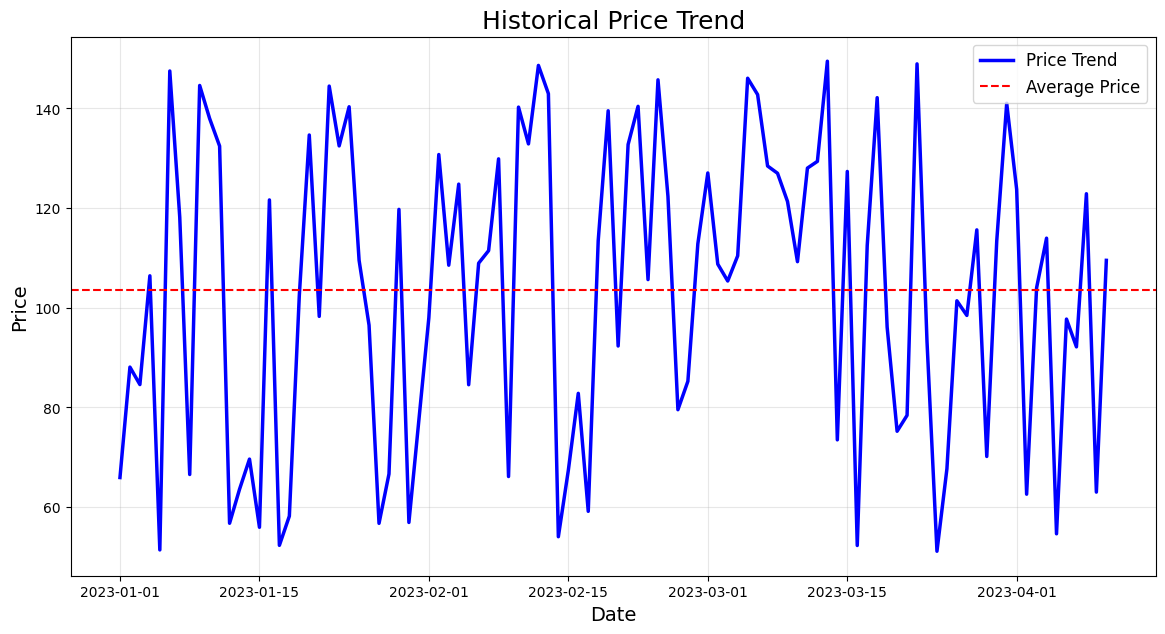

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7dv6jb/q8hei9n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7dv6jb/udp0d53x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12715', 'data', 'file=/tmp/tmp5d7dv6jb/q8hei9n_.json', 'init=/tmp/tmp5d7dv6jb/udp0d53x.json', 'output', 'file=/tmp/tmp5d7dv6jb/prophet_modelhfpq_kzr/prophet_model-20250401183536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1400x700 with 0 Axes>

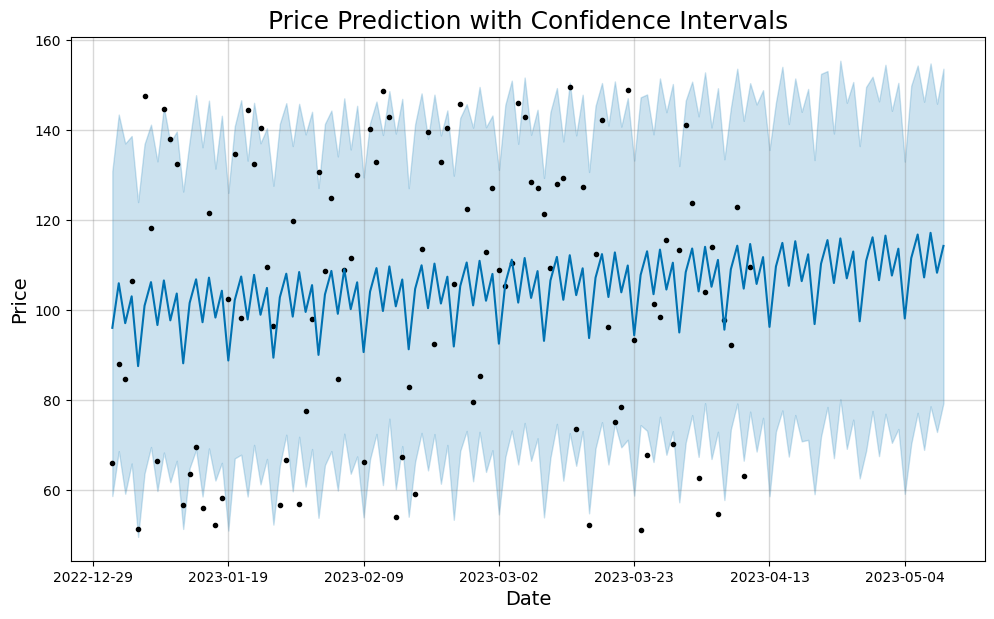

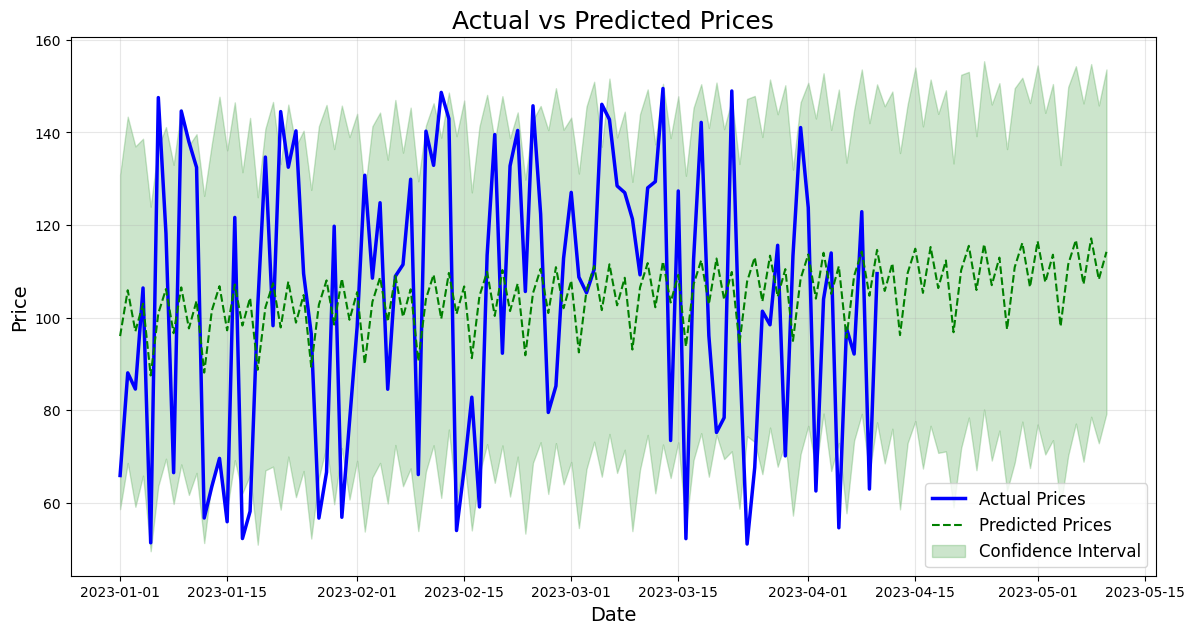

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7dv6jb/4dq3s65u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7dv6jb/4sdqhhxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79362', 'data', 'file=/tmp/tmp5d7dv6jb/4dq3s65u.json', 'init=/tmp/tmp5d7dv6jb/4sdqhhxv.json', 'output', 'file=/tmp/tmp5d7dv6jb/prophet_modelzcwm1f17/prophet_model-20250401183537.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Future Predictions (Next 30 Days):
            ds        yhat  yhat_lower  yhat_upper
100 2023-04-11  105.770314   68.533671  145.646310
101 2023-04-12  111.731211   76.031164  148.824091
102 2023-04-13   96.232631   58.609087  135.541849
103 2023-04-14  109.649158   72.956163  146.077429
104 2023-04-15  114.894228   77.678275  154.010734
105 2023-04-16  105.360547   67.421215  141.300278
106 2023-04-17  115.262826   76.654338  151.421839
107 2023-04-18  106.392122   70.807035  144.003457
108 2023-04-19  112.353019   71.129677  149.098114
109 2023-04-20   96.854439   59.058528  133.293115
110 2023-04-21  110.270967   71.854896  152.441055
111 2023-04-22  115.516036   78.441956  153.064874
112 2023-04-23  105.982355   67.064908  139.190209
113 2023-04-24  115.884634   80.174103  155.370898
114 2023-04-25  107.013930   69.143204  146.022250
115 2023-04-26  112.974827   75.633649  150.633946
116 2023-04-27   97.476248   62.573848  136.401318
117 2023-04-28  110.892775   68.691076  149.54

18:35:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


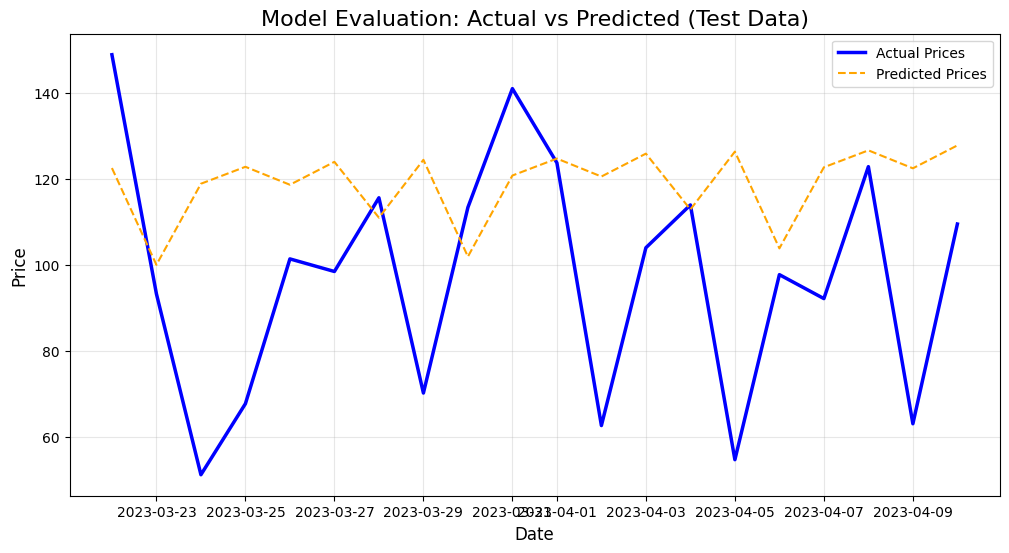


Root Mean Squared Error (RMSE) on Test Data: 36.53


In [1]:
# Step 1: Install Required Libraries (if not already installed)
!pip install pandas matplotlib seaborn scikit-learn prophet --quiet

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Step 3: Load Sample Data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'price': np.random.uniform(low=50, high=150, size=100)  # Random price data
}
df = pd.DataFrame(data)

# Step 4: Visualize the Data with a Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.pivot_table(index=df['date'].dt.year, columns=df['date'].dt.month, values='price'), cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Price Heatmap by Year and Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.show()

# Step 5: Line Chart for Price Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='price', label='Price Trend', color='blue', linewidth=2.5)
plt.axhline(df['price'].mean(), color='red', linestyle='--', label='Average Price')
plt.title("Historical Price Trend", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Step 6: Prepare Data for Forecasting
df_forecast = df.rename(columns={'date': 'ds', 'price': 'y'})

# Step 7: Train Prophet Model
model = Prophet()
model.fit(df_forecast)

# Step 8: Make Future Predictions
future_dates = model.make_future_dataframe(periods=30)  # Predict 30 days into the future
forecast = model.predict(future_dates)

# Step 9: Visualize Forecast with Prophet's Built-in Plot
plt.figure(figsize=(14, 7))
model.plot(forecast)
plt.title("Price Prediction with Confidence Intervals", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Step 10: Actual vs Predicted Comparison
plt.figure(figsize=(14, 7))
sns.lineplot(x=df['date'], y=df['price'], label='Actual Prices', color='blue', linewidth=2.5)
sns.lineplot(x=forecast['ds'], y=forecast['yhat'], label='Predicted Prices', color='green', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Confidence Interval')
plt.title("Actual vs Predicted Prices", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Step 11: Display Predictions in Tabular Format
predicted_prices = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
print("\nFuture Predictions (Next 30 Days):")
print(predicted_prices)

# Step 12: Evaluation: Actual vs Predicted (Optional)
split_idx = int(len(df) * 0.8)
train_data = df_forecast.iloc[:split_idx]
test_data = df_forecast.iloc[split_idx:]

# Retrain the model on training data
model = Prophet()
model.fit(train_data)

# Forecast for the test period
future_test = model.make_future_dataframe(periods=len(test_data))
forecast_test = model.predict(future_test)

# Plot Actual vs Predicted for Test Data
actual = test_data['y'].values
predicted = forecast_test['yhat'].iloc[-len(test_data):].values

plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['ds'], y=actual, label='Actual Prices', color='blue', linewidth=2.5)
sns.lineplot(x=test_data['ds'], y=predicted, label='Predicted Prices', color='orange', linestyle='--')
plt.title("Model Evaluation: Actual vs Predicted (Test Data)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Calculate RMSE for Test Data
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"\nRoot Mean Squared Error (RMSE) on Test Data: {rmse:.2f}")
